<a href="https://colab.research.google.com/github/Piramu-Mahalingam/DS-Course-Assignment-1/blob/main/Piramu_M_Mini_project_Supervised_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Piramu M Mini project-Supervised classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Insurance.csv')
print(df.head())
print(df.info())
print(df.describe())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

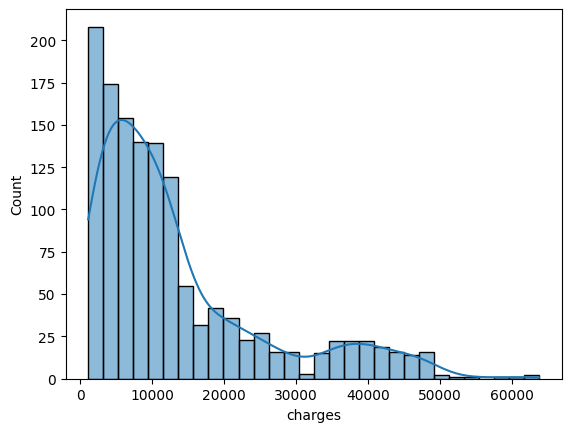

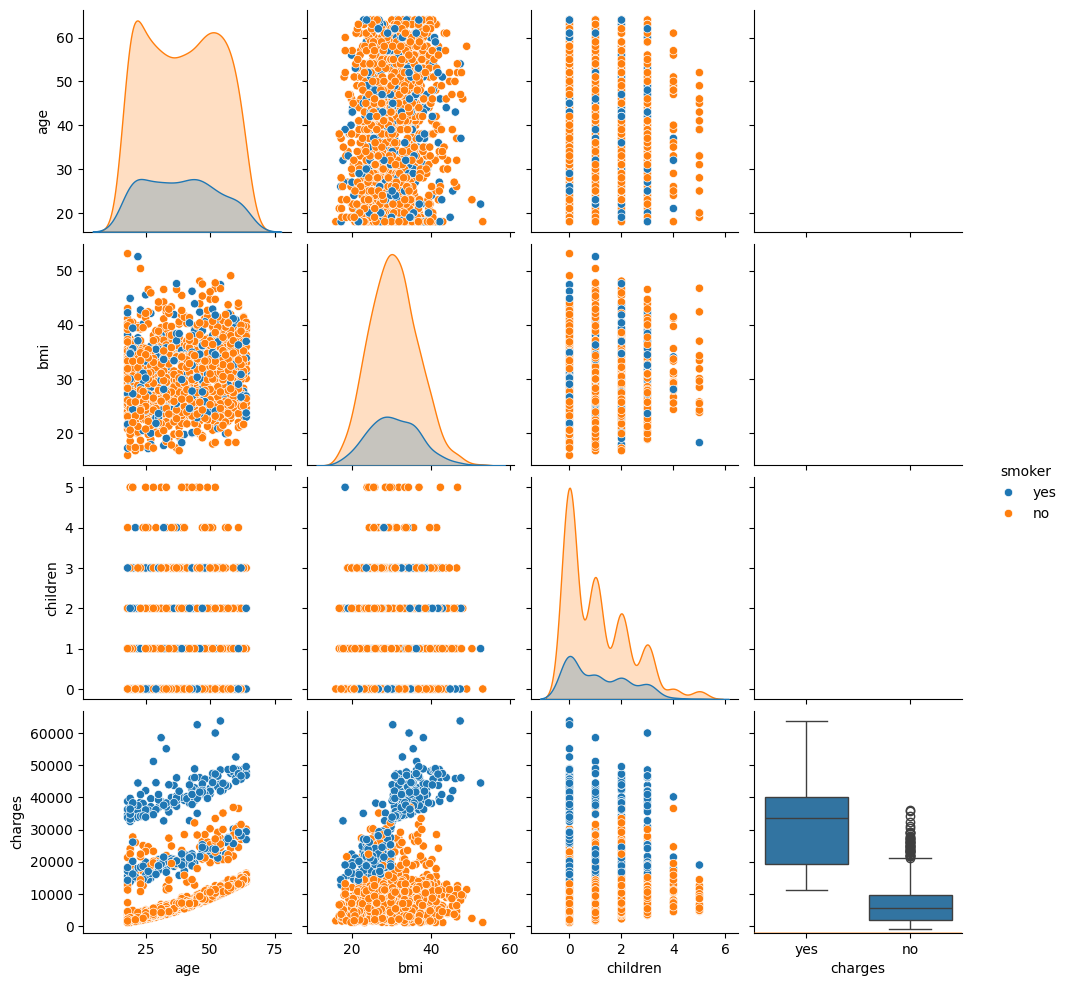

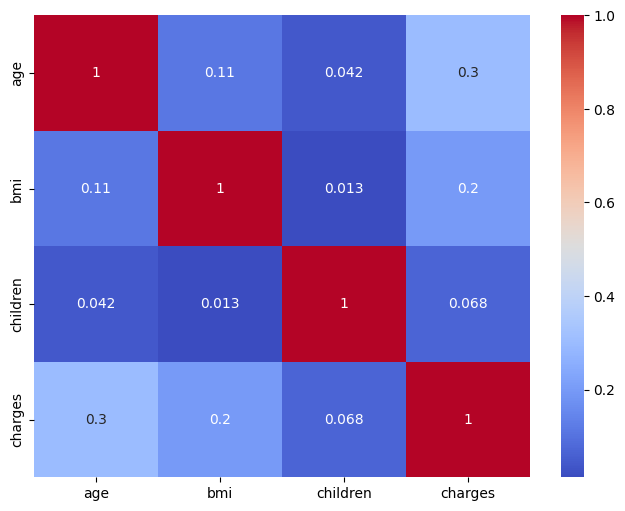

In [3]:
# Visualizations
sns.histplot(df['charges'], kde=True)
sns.pairplot(df, hue='smoker')
sns.boxplot(data=df, x='smoker', y='charges')

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


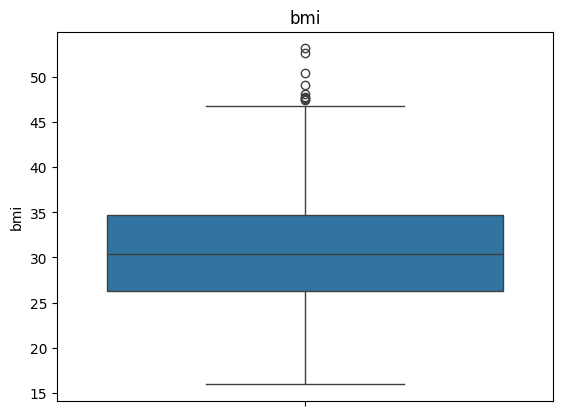

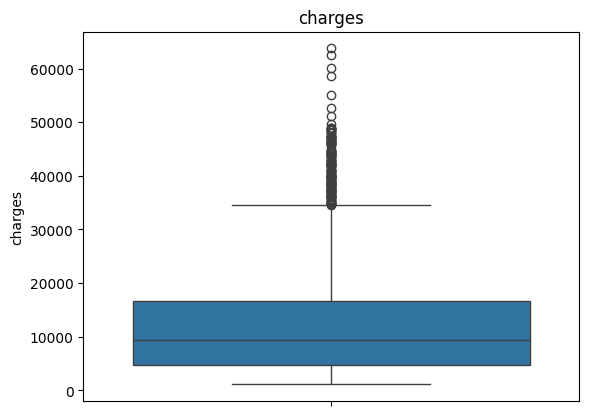

In [4]:
# Missing values
print(df.isnull().sum())

# Outliers using boxplot
for col in ['bmi', 'charges']:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()


In [7]:
# Example: Cap charges
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df = df[(df['charges'] >= lower) & (df['charges'] <= upper)]
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [9]:
from sklearn.preprocessing import StandardScaler

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
scaled_cols = ['age', 'bmi', 'children']
df_encoded[scaled_cols] = scaler.fit_transform(df_encoded[scaled_cols])
df_encoded[scaled_cols]

,age,bmi,children
0,-1.408408,-0.367748,-0.891617
1,-1.480604,0.596774,-0.069486
2,-0.758640,0.470252,1.574775
3,-0.397658,-1.221357,-0.891617
4,-0.469855,-0.206720,-0.891617
...,...,...,...
1332,0.974073,2.392722,1.574775
1333,0.829681,0.136695,1.574775
1334,-1.480604,0.292793,-0.891617
1335,-1.480604,1.102860,-0.891617


In [12]:
# First, update scikit-learn
!pip install scikit-learn --upgrade

In [14]:


# First, update scikit-learn
!pip install scikit-learn --upgrade

# After the update, restart the kernel.
# If the error persists, the squared=False argument is not supported in your scikit-learn version.
# In that case, you would need to calculate RMSE by taking the square root of MSE.
# For example:
# train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
# test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


# Now, the rest of your code should work as intended
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np # Import numpy for sqrt if needed

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # With scikit-learn updated to >= 0.22, squared=False is supported
    # If the upgrade was successful, this line should work.
    # If not, uncomment the lines below and comment out the squared=False lines
    try:
        train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
        test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    except TypeError:
        # Fallback for older scikit-learn versions
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    overfit = 'Yes' if train_r2 - test_r2 > 0.1 else 'No'

    results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Overfitting': overfit
    })

In [15]:
results_df = pd.DataFrame(results)
print(results_df)


               Model   Train RMSE    Test RMSE  Train R²   Test R² Overfitting
0  Linear Regression  2989.433570  3327.529596  0.701413  0.674158          No
1      Decision Tree     0.000000  4581.320329  1.000000  0.382347         Yes
2      Random Forest  1178.225523  3561.748198  0.953618  0.626673         Yes
3                SVR  5516.561512  6021.189556 -0.016789 -0.066910          No
4                KNN  3040.415429  3934.952072  0.691141  0.544339         Yes
5  Gradient Boosting  2402.636902  3407.741080  0.807128  0.658260         Yes


In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score (Negative RMSE):", grid.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Score (Negative RMSE): -3125.1281730463875


In [23]:
# Save the best model found by GridSearchCV
import pickle

# Ensure the directory exists if you are saving to a specific path
# import os
# os.makedirs('models', exist_ok=True) # Example: create a 'models' directory

with open('best_model.pkl', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pickle # Import pickle

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score (Negative RMSE):", grid.best_score_)

# Save the best model found by GridSearchCV
# Ensure the directory exists if you are saving to a specific path
# import os
# os.makedirs('models', exist_ok=True) # Example: create a 'models' directory

with open('best_model.pkl', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)

print("Best model saved as 'best_model.pkl'")

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Score (Negative RMSE): -3123.8176432826244
Best model saved as 'best_model.pkl'


In [18]:
# Install Streamlit
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [25]:
# app.py
import streamlit as st
import pickle
import numpy as np

# Load trained model
model = pickle.load(open('best_model.pkl', 'rb'))

st.title("Medical Insurance Cost Prediction")

age = st.slider("Age", 18, 65)
sex = st.selectbox("Sex", ['male', 'female'])
bmi = st.number_input("BMI")
children = st.slider("Children", 0, 5)
smoker = st.selectbox("Smoker", ['yes', 'no'])
region = st.selectbox("Region", ['northeast', 'southeast', 'southwest', 'northwest'])

# Encode inputs
input_data = {
    'age': age,
    'bmi': bmi,
    'children': children,
    'sex_male': 1 if sex == 'male' else 0,
    'smoker_yes': 1 if smoker == 'yes' else 0,
    'region_northwest': 1 if region == 'northwest' else 0,
    'region_southeast': 1 if region == 'southeast' else 0,
    'region_southwest': 1 if region == 'southwest' else 0,
}

input_df = pd.DataFrame([input_data])

if st.button("Predict"):
    prediction = model.predict(input_df)
    st.success(f"Predicted Insurance Charges: ${prediction[0]:,.2f}")


2025-05-30 17:46:43.754 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-30 17:46:43.869 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-30 17:46:43.870 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-30 17:46:43.872 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-30 17:46:43.873 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-30 17:46:43.874 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-30 17:46:43.875 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-30 17:46:43.876 Session state does not 